### Exercise 1 (The World Series Again)

#### The history of the World Series

The first “World Series” was played in 1903, the most recent in 2016. There has been a World Series in every intervening year except two: in 1904 (when the NL champ refused to play the AL champ) and 1994 (the strike year). That makes a total of 112 Series. In 1903, 1919, 1920, and 1921 the Series had a best-of-9 games format. That leaves 108 best-of-7 Series. (The 1919 “Black Sox” scandal was a best-of-9 Series.)
For the a summary of the number of series by length, see cell below.

Let us assume that throughout a World Series a given team has a fixed chance to win each game, that games are independent random experiments. Let us also assume that the this probability is the same for the better team in every World Series. These assumptions may seem unrealistic to you, and they are the source of one of my favorite quotes about statistics. Frederick Mosteller wrote, “It seems worthwhile to examine these assumptions a little more carefully, because any fan can readily think of good reasons why they might be invalid. Of course, strictly speaking, all such mathematical assumptions are invalid when we deal with data from the real world. The question of interest is the degree of invalidity and its consequences.”

If the better team always won, then a best-of-7 Series would last only four games. As the probability gets closer to $\frac{1}{2}$, one would expect more seven-game Series. The likelihood function depends on $p$, the probability that the “better” team wins any particular game, and on $N_k$ where $N_k$ is the number of series where the winning team loses $k$ games, so that the series lasts $4 + k$ games, $k = 0,...,3$.

Let $\mathrm{plose}(k, p)$ be the probability that a team loses $k$ games, but still is the first team to win the $4$ games needed to win the Series, when its probability of winning each game is $p$. For this to happen, the team must win $3$ and lose $k$ of the first $3+k$ games, and then win the last game:
\begin{equation}
\text{plose}(k,p)=\underbrace{{3+k\choose k}p^3(1-p)^k}_{\text{prob winning 3 and losing k}} \times \underbrace{p}_{\text{prob win last game}}.
\end{equation}

􏰄􏰃Let $\mathrm{plen}(k,p)$ denote the probability that the Series lasts $4+k$ games.  Since either team may win the series,
may win the series,
\begin{align}
\mathrm{plen}(k,p) &= \mathrm{plose}(k,p) + \mathrm{plose}(k,p)\\
&= {3+k\choose k}(p^4(1-p)^k+p^k(1-p)^4),\\
k&=0,\dots,3.
\end{align}

#### The Likelihood Function

In $N$ Series, let $N_k$ denote the number of Series where the winner loses $k$ games. $(N = N0 + N1 + N2 + N3.)$ The probability that this particular set of lengths occurs is also the likelihood function, and is given by the multinomial probability
\begin{align}
L(p;N_0,N_1,N_2,N_3)&=\frac{N!}{N_0!N_1!N_2!N_3!}\prod_{k=0}^{3}\mathrm{plen}(k,p)^{N_k}\\
&=\underbrace{{N_0!N_1!N_2!N_3!}\left(\prod_{k=0}^3{3+k\choose k}^{N_k}\right)}_{\text{independent of $p$}}\prod_{k=0}^3\left(p^4(1-p)^k+p^k(1-p)^4\right)^{N_k}.
\end{align}

Since we want to choose $p$ to maximize the likelihood unction we may ignore the positive constant term and just concentrate on the part that depends on $p$:
\begin{equation}
\tilde{L}(p;N_0,N_1,N_2,N_3)=\prod_{k=0}^3\left(p^4(1-p)^k+p^k(1-p)^4\right)^{N_k}
\end{equation}

### Begin Assignment

The following table summarizes the number of best-of-7 Series where the winning team loses $k$ games (108 in total).
\begin{equation}
N_0=21, \quad N_1=25, \quad N_2=24, \quad N_3=38.
\end{equation}

### Exercise 1.1

Peruse Mosteller’s analysis [1].

### Exercise 1.2

Graph the likelihood function as a function of $p$. (If you wish, you may discard the constants and use $\tilde{L}$ instead of $L$). Graph the log of the likelihood function.
You should get graphs that are symmetric about $\frac{1}{2}$. In particular, there will be two maxima.

In [2]:
from matplotlib import pyplot as plt
from math import log

In [30]:
# observations
N = {}
N[0] = 21
N[1] = 25
N[2] = 24
N[3] = 38
# Likelihood
L = {}
for i in range(0,100+1):
    p = i*1/100
    L[p] = 1
    for k in range(0,3+1):
        L[p] = L[p] * (p**4*(1-p)**k + p**k*(1-p)**4)**N[k]

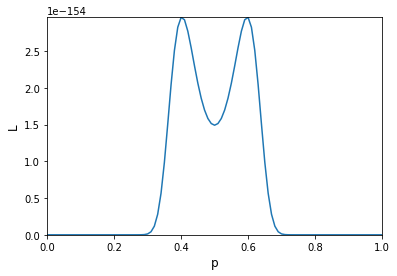

In [31]:
# clear figure
plt.clf()

# y axis
y_min = min(L.values())
y_max = max(L.values())
plt.ylim(bottom=y_min, top=y_max)
#plt.yscale('log',base=3)
#ylabels = [r"$2^{2.5}$", r"$2^{3}$",
#r"$2^{3.5}$", r"$2^{4}$", r"$2^{4.5}$"]
#plt.yticks(ticks=yticks, labels=ylabels)
y_title = "L"
plt.ylabel(y_title, fontsize=12)

#x axis
x_min=0
x_max=1
x_title = "p"
plt.xlabel(x_title, fontsize=12)
#plt.xscale('log', base=3)
plt.xlim(left=x_min, right=x_max)
#xticks = tas
#xlabels = [r"$3^{0}$", r"$3^{1}$", r"$3^{2}$", r"$3^{3}$]"
#plt.xticks(ticks=xticks, labels=xlabels, size=14)

plt.plot(L.keys(), L.values())
plt.show()

In [32]:
# Likelihood
logL = {}
for i in range(20,80+1):
    p = i*1/100
    logL[p] = 1
    for k in range(0,3+1):
        logL[p] = logL[p] * (p**4*(1-p)**k + p**k*(1-p)**4)**N[k]
    logL[p] = log(logL[p])

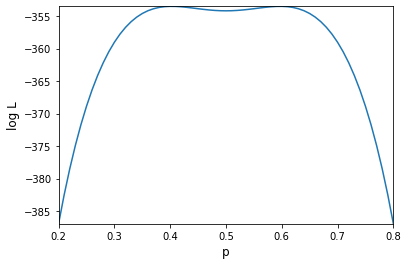

In [33]:
# clear figure
plt.clf()

# y axis
y_min = min(logL.values())
y_max = max(logL.values())
plt.ylim(bottom=y_min, top=y_max)
#plt.yscale('log',base=3)
#ylabels = [r"$2^{2.5}$", r"$2^{3}$",
#r"$2^{3.5}$", r"$2^{4}$", r"$2^{4.5}$"]
#plt.yticks(ticks=yticks, labels=ylabels)
y_title = "log L"
plt.ylabel(y_title, fontsize=12)

#x axis
x_min=0.2
x_max=0.8
x_title = "p"
plt.xlabel(x_title, fontsize=12)
#plt.xscale('log', base=3)
plt.xlim(left=x_min, right=x_max)
#xticks = tas
#xlabels = [r"$3^{0}$", r"$3^{1}$", r"$3^{2}$", r"$3^{3}$]"
#plt.xticks(ticks=xticks, labels=xlabels, size=14)

plt.plot(logL.keys(), logL.values())
plt.show()

### Exercise 1.3

Since we are interested in the probability that the better team wins, we should only consider $p\geq0.5$. So find the maximum likelihood estimate of $p$ subject to $p\geq0.5$. Do the same for the logarithm of the likelihood.

This is a well behaved function.  We could just take the derivative and find the 0s.  Instead, we'll use numerical optimizers.  See code below. $\square$

In [99]:
from scipy.optimize import minimize_scalar

In [122]:
def funcL(p):
    L = 1
    for k in range(0,3+1):
        L = L * (p**4*(1-p)**k + p**k*(1-p)**4)**N[k]
    return -L

In [141]:
bounds = (.56, .64)
phat = 1-minimize_scalar(funcL, bounds).x
print("The maximum likelihood estimate of p is {0}".format(phat))

The maximum likelihood estimate of p is 0.5972403326271332


In [91]:
def funcLogL(p):
    L = 1
    for k in range(0,3+1):
        L = L * (p**4*(1-p)**k + p**k*(1-p)**4)**N[k]
    return -log(L)   

In [143]:
bounds = (.56, .64)
phat = minimize_scalar(funcLogL, bounds).x
print("The maximum likelihood estimate of p is {0}".format(phat))

The maximum likelihood estimate of p is 0.5972403496665595


### Exercise 1.4

Using this estimate, what is the probability that the better team wins a best-of-7 series?

See code below. $\square$

In [135]:
from scipy.special import binom

In [138]:
def plose(k, p):
    return binom(3+k, k) * p**3 * (1-p)**k * p

In [140]:
pstar = 0.5972403496665595
pw = sum([plose(k, pstar) for k in range(0,3+1)])
print("The probability that the better team wins a best-of-7 series is approximately {0}".format(pw))

The probability that the better team wins a best-of-7 series is approximately 0.7048488010990469


### Exercise 1.5

There are other ways we can estimate $p$. One is the method of moments. Each value of $p$ determines an expected number of losses by the winning team.

What is the formula for the expected number of losses in a first-to-win- four series as a function of $p$?

First, note that the probability that the winning team loses exactly $k$ times is the same as the probability that the series lasts $4+k$ games.  We already wrote the latter formula above.  It is given by
\begin{align}
\mathrm{plen}(k,p) &= \mathrm{plose}(k,p) + \mathrm{plose}(k,p)\\
&= {3+k\choose k}(p^4(1-p)^k+p^k(1-p)^4),\\
k&=0,\dots,3.
\end{align}

Hence, the formula for the expected number of losses is given by
\begin{equation}
\sum_{k=0}^{3}k\times\mathrm{plen}(k,p). \square
\end{equation}

What is is the actual average number of losses by the winning team in the 108 7-game series?

Using our summary table above, this is given by the straightforward computation
\begin{align}
\frac{0\times N_0+1\times N_1+2\times N_2+3\times N_3}{108}\\
=\frac{0\times 21+1\times 25+2\times 24+3\times 38}{108}\\
=\frac{187}{108}\approx 1.73. \square
\end{align}

What value of $p$ equates the expected number of losses to the actual
average number of losses? This is a moment estimator of $p$.
Hint: One way to numerically solve an equation like $f(x) = c$ for $x$ is to minimize $(f(x) − c)^2$ with respect to $x$. If the equation has a solution, then the minimum value is zero, and is attained at the solution.

See code below. $\square$

In [148]:
def f(p):
    empirical_e = 1.73
    e = 0
    for k in range(0,3+1):
        e += k*binom(3+k, k)*(p**4*(1-p)**k+p**k*(1-p)**4)
    return (e-empirical_e)**2

In [156]:
bounds = (.5, 1)
phat = minimize_scalar(f, bounds).x

In [158]:
print("The value of p that equates the expected number of losses to the actual average number of losses is {0}".format(phat))

The value of p that equates the expected number of losses to the actual average number of losses is 0.5843794472723904
